In [14]:
import ovationpyme

In [37]:
def idl_call_results(request=None):
    results = {
        'atype': 'diff',
        'season': 'winter',
        'i_mlt': 30,
        'j_mlat': 140,
        'j_mlat_NS': 60,
        'je': 0.0549602,
        'b1p': 0.826437,
        'b2p': 2.26261e-05,
        'b1a': 0.0634671,
        'b2a': -2.70994e-06,
        'dF': 3134.17,
        'prob': 0.897351
        }
    return results

In [38]:
j_mlat, i_mlt = idl_call_results()['j_mlat'], idl_call_results()['i_mlt']

In [39]:
j_mlat

140

In [40]:
i_mlt

30

In [41]:
idl_dF = idl_call_results()['dF']
idl_prob = idl_call_results()['prob']

In [42]:
def seasonal_flux_estimator(request=None):
    season, atype, energy_or_number = 'winter', 'diff', 'energy'
    return ovationpyme.ovation_prime.SeasonalFluxEstimator(season, atype, energy_or_number)

In [43]:
obj = seasonal_flux_estimator()

In [44]:
py_prob = obj.prob_estimate(idl_dF, i_mlt, j_mlat)

In [45]:
py_prob

0.858068039802

In [29]:
py_flux = obj.estimate_auroral_flux(idl_dF, i_mlt, j_mlat)

In [30]:
py_flux

0.049330695727270855

In [27]:
import datetime

import numpy as np
import matplotlib.pyplot as pp

from ovationpyme import ovation_prime
from ovationpyme import ovation_utilities
from geospacepy import satplottools, special_datetime

def draw_seasonal_flux(seasonN='summer', seasonS='winter', atype='diff', jtype='energy', dF=2134.17):
    dF = 2134.17

    estimatorN = ovation_prime.SeasonalFluxEstimator(seasonN, atype, jtype)
    estimatorS = ovation_prime.SeasonalFluxEstimator(seasonS, atype, jtype)
    
    global  fluxtupleN
    fluxtupleN = estimatorN.get_gridded_flux(dF, combined_N_and_S=False)
    (mlatgridN, mltgridN, fluxgridN) = fluxtupleN[:3]

    fluxtupleS = estimatorS.get_gridded_flux(dF, combined_N_and_S=False)
    (mlatgridS, mltgridS, fluxgridS) = fluxtupleS[3:]

    f = pp.figure(figsize=(11, 5))
    aN = f.add_subplot(121)
    aS = f.add_subplot(122)

    f2 = pp.figure(figsize=(5, 5))
    a2 = f2.add_subplot(111)

    XN, YN = satplottools.latlt2cart(mlatgridN.flatten(), mltgridN.flatten(), 'N')
    XS, YS = satplottools.latlt2cart(mlatgridS.flatten(), mltgridS.flatten(), 'S')

    XN = XN.reshape(mlatgridN.shape)
    YN = YN.reshape(mltgridN.shape)
    XS = XS.reshape(mlatgridS.shape)
    YS = YS.reshape(mltgridS.shape)

    satplottools.draw_dialplot(aN)
    satplottools.draw_dialplot(aS)
    satplottools.draw_dialplot(a2)

    mappableN = aN.pcolormesh(XN, YN, fluxgridN, vmin=0, vmax=2)
    mappableS = aS.pcolormesh(XS, YS, fluxgridS, vmin=0, vmax=2)
    mappableNS = a2.pcolormesh(XN, YN, (fluxgridS + fluxgridN) / 2, vmin=0, vmax=2)

    # aN.set_title("Northern Hemisphere Flux")
    # aS.set_title("Southern Hemisphere Flux")

    f.colorbar(mappableN, ax=aN)
    f.colorbar(mappableS, ax=aS)
    f.colorbar(mappableNS, ax=a2)

    f.suptitle(
        "OvationPyme Auroral Model Raw Flux Output \n Season:{0}, AuroralType:{1}, FluxType:{2}, Newell Coupling:{"
        "3:.3f}".format(
            seasonN, atype, jtype, dF),
        fontweight='bold')

    f2.suptitle(
        "OvationPyme Combined Hemisphere Output \n Season:{0}, AuroralType:{1}, FluxType:{2}, Newell Coupling:{3:.3f}".format(
            seasonS, atype, jtype, dF),
        fontweight='bold')

    return f, f2

In [28]:
seasonN = 'summer'
seasonS = 'winter'
atype = 'ions'
jtype = 'energy'
tfmt = '%Y%m%d'
day = 1

# Times given in figure 2 of Cousins et. al. 2015
dt1 = datetime.datetime(2023, 9, day, 12, 10, 0)
dt2 = datetime.datetime(2023, 9, day, 7, 40, 0)
dt3 = datetime.datetime(2023, 9, day, 0, 50, 0)

In [31]:
dt = dt1

In [32]:
def draw_conductance(dt, hemi):
    """
    Get the hall and pedersen conductance for one date and hemisphere
    """
    estimator = ovation_prime.ConductanceEstimator(fluxtypes=['diff', 'mono'])

    mlatgrid, mltgrid, pedgrid, hallgrid = estimator.get_conductance(dt, hemi=hemi, auroral=True, solar=True)

    f = pp.figure(figsize=(11, 5))
    aH = f.add_subplot(121)
    aP = f.add_subplot(122)

    X, Y = satplottools.latlt2cart(mlatgrid.flatten(), mltgrid.flatten(), hemi)
    X = X.reshape(mlatgrid.shape)
    Y = Y.reshape(mltgrid.shape)

    satplottools.draw_dialplot(aH)
    satplottools.draw_dialplot(aP)

    mappableH = aH.pcolormesh(X, Y, hallgrid, vmin=0., vmax=20.)
    mappableP = aP.pcolormesh(X, Y, pedgrid, vmin=0., vmax=15.)

    aH.set_title("Hall Conductance")
    aP.set_title("Pedersen Conductance")

    f.colorbar(mappableH, ax=aH)
    f.colorbar(mappableP, ax=aP)

    f.suptitle("OvationPyme Conductance Output {0} Hemisphere at {1} \n".format(hemi, dt.strftime('%c')),
               fontweight='bold')
    return f

(44640,)
(43200,)
(44640,)
(43200,)
(44640,)
(43200,)


/Users/a.konkin/PycharmProjects/OvationPyme/ovationpyme/ovation_prime.py:363: RuntimeWarning: invalid value encountered in divide
  grideavg = (gridenergyflux / 1.6e-12) / gridnumflux  # energy flux Joules->eV


(8760,)


/var/folders/dz/gt13cmf51h755d9nll1kvmmw0000gq/T/ipykernel_1563/3240489943.py:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mappableH = aH.pcolormesh(X, Y, hallgrid, vmin=0., vmax=20.)
/var/folders/dz/gt13cmf51h755d9nll1kvmmw0000gq/T/ipykernel_1563/3240489943.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mappableP = aP.pcolormesh(X, Y, pedgrid, vmin=0., vmax=15.)


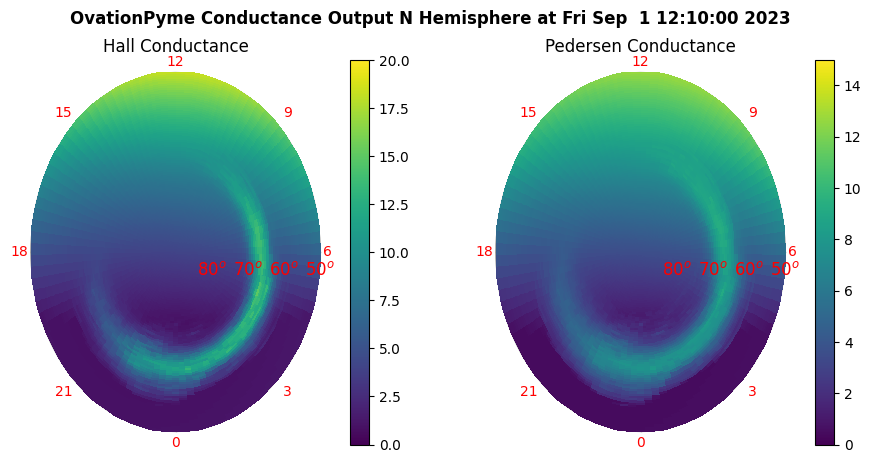

In [33]:
f2N = draw_conductance(dt, 'N')